# import required libraries and loading the data

In [14]:


import pandas as pd 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


warnings.simplefilter(action='ignore')
plt.style.use('seaborn')
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.1, rotation_range = 5, width_shift_range=0.05, height_shift_range=0.05, horizontal_flip = True, vertical_flip=False,validation_split=0.3)
training_set = train_datagen.flow_from_directory(r'C:\Users\nm670\Downloads\Compressed\chest_xray\train',subset='training',class_mode = 'binary',batch_size=32,shuffle=False,color_mode='grayscale')
test_datagen = ImageDataGenerator(rescale=1./255)
val_set = train_datagen.flow_from_directory(r'C:\Users\nm670\Downloads\Compressed\chest_xray\train',subset='validation',class_mode = 'binary',batch_size=32,shuffle=False,color_mode='grayscale')
test_set = test_datagen.flow_from_directory(r'C:\Users\nm670\Downloads\Compressed\chest_xray\test',batch_size=32,
                         class_mode='binary',color_mode='grayscale')



Found 3652 images belonging to 2 classes.
Found 1564 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# checking on the shape 

In [2]:

training_set.image_shape


(256, 256, 1)

# Loading Deep Learning Libraries

In [3]:


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPool2D, Conv2D



# Bulding Model Architecture

In [4]:


classifier = models.Sequential()
  
classifier.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(256,256,1)))
classifier.add(layers.MaxPooling2D((2, 2)))
  
classifier.add(layers.Conv2D(32, (3, 3), activation ='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
  
classifier.add(layers.Conv2D(32, (3, 3), activation ='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
  
classifier.add(layers.Conv2D(32, (3, 3), activation ='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
  
classifier.add(layers.Flatten())
  
classifier.add(layers.Dense(128,activation ='relu'))
classifier.add(layers.Dense(1, activation ="sigmoid"))



# Displaying model architecture

In [5]:


classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

# compile our model then training 

In [6]:


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [7]:


history = classifier.fit(training_set,
                         steps_per_epoch= training_set.samples//training_set.batch_size,
                         epochs = 20,
                         validation_data = val_set ,
                      validation_steps=val_set.samples//val_set.batch_size)



Epoch 1/20
114/114 [==============================] - 334s 3s/step - loss: 0.8204 - accuracy: 0.7494 - val_loss: 1.5121 - val_accuracy: 0.7383
Epoch 2/20
114/114 [==============================] - 315s 3s/step - loss: 0.6308 - accuracy: 0.7494 - val_loss: 0.4863 - val_accuracy: 0.7415
Epoch 3/20
114/114 [==============================] - 303s 3s/step - loss: 0.4675 - accuracy: 0.7773 - val_loss: 0.3964 - val_accuracy: 0.8053
Epoch 4/20
114/114 [==============================] - 303s 3s/step - loss: 0.3698 - accuracy: 0.8506 - val_loss: 0.2954 - val_accuracy: 0.8841
Epoch 5/20
114/114 [==============================] - 301s 3s/step - loss: 0.2679 - accuracy: 0.8978 - val_loss: 0.2808 - val_accuracy: 0.8822
Epoch 6/20
114/114 [==============================] - 302s 3s/step - loss: 0.2201 - accuracy: 0.9109 - val_loss: 0.2098 - val_accuracy: 0.9212
Epoch 7/20
114/114 [==============================] - 310s 3s/step - loss: 0.2180 - accuracy: 0.9177 - val_loss: 0.2832 - val_accuracy: 0.8841

In [9]:
import numpy as np
print('Train accuracy: {}%'.format(np.round(history.history['accuracy'][-1]*100, 2)))

Train accuracy: 93.29%


# Plotting train vs validation curves 

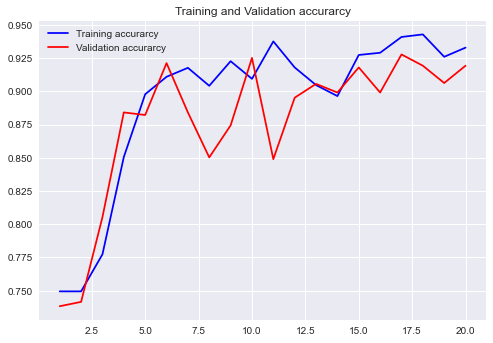

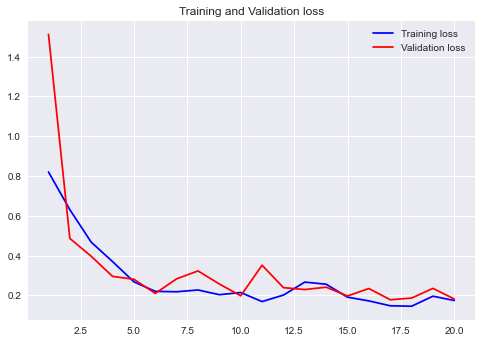

In [10]:


import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()



# showing photos from our dataset

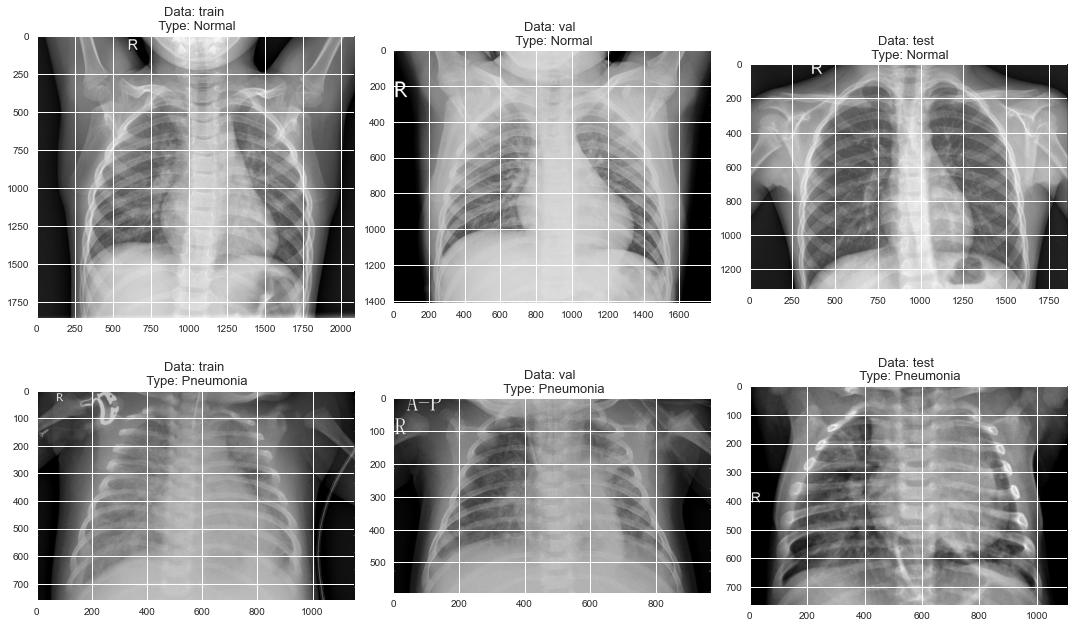

In [11]:


import os
drct_path = r'C:\Users\nm670\Downloads\Compressed\chest_xray'
fig, ax = plt.subplots(2, 3, figsize = (15, 9))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'val', 'test']):
    set_path = drct_path +'/'+ _set
    ax[i].imshow(plt.imread(set_path + '/NORMAL/' + os.listdir(set_path + '/NORMAL')[0]), cmap = 'gray')
    ax[i].set_title('Data: {} \n Type: Normal'.format(_set), fontsize = 13)
    ax[i+3].imshow(plt.imread(set_path + '/PNEUMONIA/' + os.listdir(set_path + '/PNEUMONIA')[0]), cmap = 'gray')
    ax[i+3].set_title('Data: {} \n Type: Pneumonia'.format(_set), fontsize = 13)
    
    

# visualizing CNN process

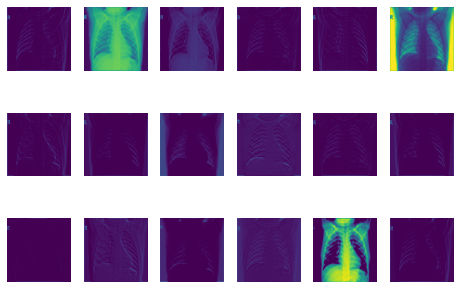

In [12]:

from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot
from tensorflow.keras.models import  load_model, Model
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
img = image.load_img(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)
square = 3
rows = 6
ix = 1
for _ in range(square):
    for _ in range(rows):
        ax = pyplot.subplot(square, rows, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1

        

In [13]:

Classes = training_set.class_indices 
Classes


{'NORMAL': 0, 'PNEUMONIA': 1}

# Evaluating model on Test data

In [25]:
score  = classifier.evaluate(test_set)
print("Loss :",score[0])
print("Accuracy :",score [1])

20/20 [==============================] - 15s 741ms/step - loss: 0.7450 - accuracy: 0.7340
Loss : 0.7450100779533386
Accuracy : 0.7339743375778198


# image from normal file

Normal


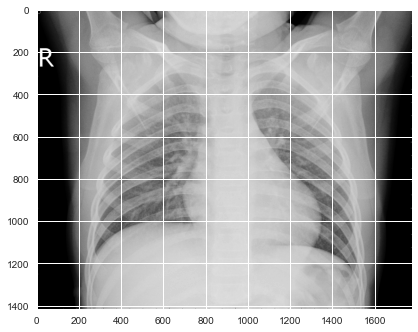

In [22]:


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 

test_image = image.load_img(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpg',color_mode="grayscale", target_size =(256,256,1) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] ==1 :
    prediction = 'Covid_19'
else:
    prediction = 'Normal'
    
print (prediction)
image = plt.imread(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpg')
plt.imshow(image)
plt.imshow(image, cmap = 'gray')


# image from pneumonia file

Covid_19


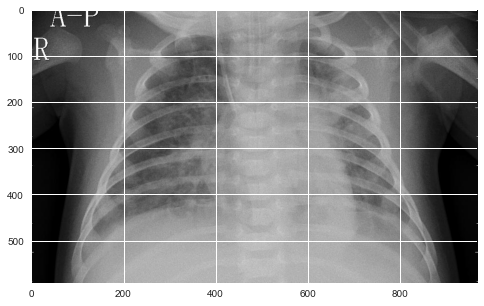

In [23]:


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 

test_image = image.load_img(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg',color_mode="grayscale", target_size =(256,256,1) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] ==1 :
    prediction = 'Covid_19'
else:
    prediction = 'Normal'
    
print (prediction)
image = plt.imread(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg')
plt.imshow(image)
plt.imshow(image, cmap = 'gray')


# covid_19 image outside the dataset

Covid_19


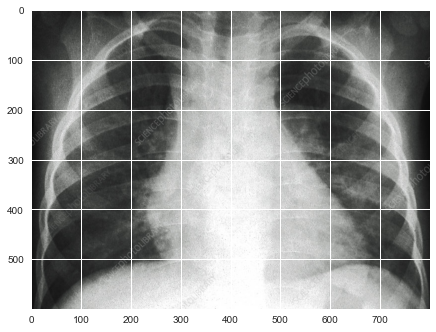

In [24]:


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
test_image = image.load_img(r'C:\Users\nm670\Downloads\Compressed\WhatsApp Image 2021-06-11 at 3.24.49 AM.jpeg',color_mode="grayscale", target_size =(256,256,1) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] ==1 :
    prediction = 'Covid_19'
else:
    prediction = 'Normal'
    
print (prediction)
image = plt.imread(r'C:\Users\nm670\Downloads\Compressed\WhatsApp Image 2021-06-11 at 3.24.49 AM.jpeg')
plt.imshow(image)
plt.imshow(image, cmap = 'gray')


# saving our model

In [26]:
classifier.save('my_model_01.hdf5')
print("model saved!!!")

model saved!!!


In [27]:
model1 = load_model(r'c:\Users\nm670\my_model_01.hdf5')


Covid_19


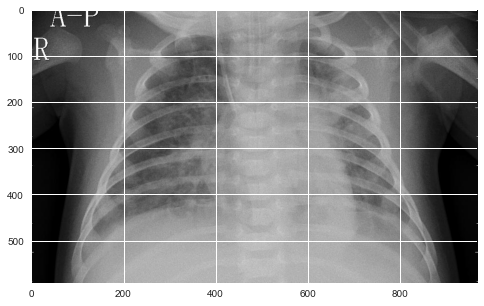

In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 

test_image = image.load_img(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg',color_mode="grayscale", target_size =(256,256,1) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = model1.predict(test_image)
training_set.class_indices
if result [0][0] ==1 :
    prediction = 'Covid_19'
else:
    prediction = 'Normal'
    
print (prediction)
image = plt.imread(r'C:\Users\nm670\Downloads\Compressed\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg')
plt.imshow(image)
plt.imshow(image, cmap = 'gray')
